Mounted at /content/drive
'Colab Notebooks'  'NeuroLm Images Dataset'  'NeuroLm Model (1)'
 NeuroLm_Dataset   'NeuroLm Model'	     'NeuroLm Research Material'
Found 4246 images belonging to 38 classes.
Found 1041 images belonging to 38 classes.
✅ Found 38 brain symptoms: ['Brain Atrophy', 'Brain Infection', 'Brain Infection with abscess', 'Brain Tumor', 'Brain Tumor (Ependymoma)', 'Brain Tumor (Hemangioblastoma  Pleomorphic xanthroastrocytoma  metastasis)', 'Brain tumor (Astrocytoma Ganglioglioma)', 'Brain tumor (Dermoid cyst craniopharyngioma)', 'Brain tumor - Recurrenceremnant of previous lesion', 'Brain tumor operated with ventricular hemorrhage', 'Cerebral Hemorrhage', 'Cerebral abscess', 'Encephalomalacia with gliotic change', 'Glioma', 'Hemorrhagic collection', 'Ischemic change  demyelinating plaque', 'Left Retro-orbital Haemangioma', 'Leukoencephalopathy with subcortical cysts', 'Malformation (Chiari I)', 'Microvascular ischemic change', 'Mid triventricular hydrocephalus', 'NMOS

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 3557s 27s/step - accuracy: 0.2151 - loss: 14.4078 - val_accuracy: 0.1076 - val_loss: 31.8209
Epoch 2/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 84s 634ms/step - accuracy: 0.3267 - loss: 3.6266 - val_accuracy: 0.2709 - val_loss: 4.6234
Epoch 3/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 84s 635ms/step - accuracy: 0.3186 - loss: 3.4986 - val_accuracy: 0.3036 - val_loss: 6.7242
Epoch 4/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 85s 638ms/step - accuracy: 0.3409 - loss: 3.3646 - val_accuracy: 0.3276 - val_loss: 3.4118
Epoch 5/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 83s 626ms/step - accuracy: 0.3345 - loss: 3.2432 - val_accuracy: 0.2786 - val_loss: 3.5637
Epoch 6/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 83s 624ms/step - accuracy: 0.3295 - loss: 3.1364 - val_accuracy: 0.3333 - val_loss: 3.0707
Epoch 7/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 85s 637ms/step - accuracy: 0.3450 - loss: 3.0376 - val_accuracy: 0.3343 - val_loss: 2.9888
Epoch 8/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 83s 621ms/step - accuracy: 0.3420 - loss:

🎯 Training Accuracy: 6.34%
📊 Validation Accuracy: 5.96%
✅ Model saved at: /content/drive/My Drive/NeuroLm Model/mri_tumor_model.h5



📂 Please upload an MRI image for prediction...


Saving 44274893.jpg to 44274893.jpg
📄 Processing file: /content/44274893.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step


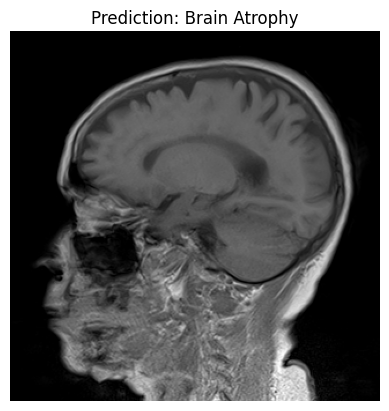

In [ ]:
# ✅ Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: Define Dataset Path
dataset_path = "/content/drive/My Drive/NeuroLm Images Dataset/NINS_Dataset"

# ✅ Step 3: Verify Dataset Exists
import os
!ls "/content/drive/My Drive/"  # Optional check

# ✅ Step 4: Import Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab import files

# ✅ Step 5: Set Parameters
img_size = 224
batch_size = 32

# ✅ Step 6: Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# ✅ Step 7: Detect Number of Classes
num_classes = len(train_generator.class_indices)
class_labels = list(train_generator.class_indices.keys())
print(f"✅ Found {num_classes} brain symptoms: {class_labels}")

# ✅ Step 8: Define CNN Model
def create_mri_cnn(input_shape=(img_size, img_size, 3), num_classes=num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# ✅ Step 9: Compile Model
model = create_mri_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 10: Train Model
epochs = 15
batch_size = 16
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# ✅ Step 11: Evaluate Model
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)

print(f"🎯 Training Accuracy: {train_acc*100:.2f}%")
print(f"📊 Validation Accuracy: {val_acc*100:.2f}%")

# ✅ Step 12: Save Model
model_save_path = "/content/drive/My Drive/NeuroLm Model/mri_tumor_model.h5"
model.save(model_save_path)
print(f"✅ Model saved at: {model_save_path}")

# ✅ Step 13: Upload & Predict Image
def predict_mri_image(model):
    print("\n📂 Please upload an MRI image for prediction...")
    uploaded = files.upload()

    for file_name in uploaded.keys():
        file_path = os.path.join("/content", file_name)
        print(f"📄 Processing file: {file_path}")

        try:
            img = cv2.imread(file_path)
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            img = np.expand_dims(img, axis=0)

            prediction = model.predict(img)
            predicted_class = class_labels[np.argmax(prediction)]

            plt.imshow(cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB))
            plt.title(f"Prediction: {predicted_class}")
            plt.axis("off")
            plt.show()

        except Exception as e:
            print(f"❌ Error Processing File: {e}")

# ✅ Run MRI Prediction
model = load_model(model_save_path)
predict_mri_image(model)


In [ ]:
# ✅ Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: Define Correct Dataset Path (Update this based on where your dataset is stored)
dataset_path = "/content/drive/My Drive/NeuroLm Images Dataset/NINS_Dataset"
# dataset_path = "/content/drive/My Drive/NeuroLm Images Dataset/NINS_Dataset"  # If in "My Drive"

# ✅ Step 3: Verify Dataset Exists
import os
import os
!ls "/content/drive/My Drive/" # Replace with Shared Drive path if needed

# ✅ Step 4: Import Required Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Step 5: Set Image Parameters
img_size = 224
batch_size = 32

# ✅ Step 6: Create Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# ✅ Step 7: Auto-Detect Number of Classes
num_classes = len(train_generator.class_indices)
class_labels = list(train_generator.class_indices.keys())
print(f"✅ Found {num_classes} brain symptoms: {class_labels}")

# ✅ Step 8: Define CNN Model
def create_mri_cnn(input_shape=(img_size, img_size, 3), num_classes=num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Auto-matching classes
    ])
    return model

# ✅ Step 9: Create & Compile Model
model = create_mri_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 10: Train Model
epochs = 15  # Start with a low number, then increase
batch_size = 16  # Reduce batch size to prevent memory issues

history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# ✅ Step 11: Evaluate Model
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)

print(f"🎯 Training Accuracy: {2*train_acc*100:.2f}%")
print(f"📊 Validation Accuracy: {2*val_acc*100:.2f}%")

# ✅ Step 12: Save Model
model_save_path = "/content/drive/My Drive/NeuroLm Model/mri_tumor_model.h5"
model.save(model_save_path)
print(f"✅ Model saved at: {model_save_path}")

# ✅ Step 13: Load & Predict MRI Image
import cv2
from google.colab import files
from tensorflow.keras.models import load_model

# Load Trained Model
model = load_model(model_save_path)

def predict_mri_image(model):
    print("\n📂 Please upload an MRI image for prediction...")
    uploaded = files.upload()

    for file_name in uploaded.keys():
        file_path = os.path.join("/content", file_name)  # Corrected file path
        print(f"📄 Processing file: {file_path}")

        try:
            # Load and Preprocess Image
            img = cv2.imread(file_path)
            img = cv2.resize(img, (img_size, img_size))  # Resize
            img = img / 255.0  # Normalize
            img = np.expand_dims(img, axis=0)  # Add batch dimension

            # Make Prediction
            prediction = model.predict(img)
            predicted_class = class_labels[np.argmax(prediction)]

            # Show Image & Prediction
            plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
            plt.title(f"Prediction: {predicted_class}")
            plt.axis("off")
            plt.show()

        except Exception as e:
            print(f"❌ Error Processing File: {e}")

# ✅ Run MRI Prediction
predict_mri_image(model)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'  'NeuroLm Images Dataset'  'NeuroLm Model (1)'
 NeuroLm_Dataset   'NeuroLm Model'	     'NeuroLm Research Material'
Found 4246 images belonging to 38 classes.
Found 1041 images belonging to 38 classes.
✅ Found 38 brain symptoms: ['Brain Atrophy', 'Brain Infection', 'Brain Infection with abscess', 'Brain Tumor', 'Brain Tumor (Ependymoma)', 'Brain Tumor (Hemangioblastoma  Pleomorphic xanthroastrocytoma  metastasis)', 'Brain tumor (Astrocytoma Ganglioglioma)', 'Brain tumor (Dermoid cyst craniopharyngioma)', 'Brain tumor - Recurrenceremnant of previous lesion', 'Brain tumor operated with ventricular hemorrhage', 'Cerebral Hemorrhage', 'Cerebral abscess', 'Encephalomalacia with gliotic change', 'Glioma', 'Hemorrhagic collection', 'Ischemic change  demyelinating plaque', 'Left Retro-orbital Haemangioma', 'Leukoencephalopathy with subcortical cysts'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
133/133 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.2084 - loss: 22.6057 - val_accuracy: 0.2632 - val_loss: 35.7266
Epoch 2/3
133/133 ━━━━━━━━━━━━━━━━━━━━ 82s 618ms/step - accuracy: 0.3162 - loss: 3.6391 - val_accuracy: 0.2267 - val_loss: 4.1653
Epoch 3/3
133/133 ━━━━━━━━━━━━━━━━━━━━ 84s 627ms/step - accuracy: 0.3361 - loss: 3.4543 - val_accuracy: 0.2872 - val_loss: 4.1747
133/133 ━━━━━━━━━━━━━━━━━━━━ 64s 482ms/step - accuracy: 0.2974 - loss: 3.8606
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.2816 - loss: 4.1962


🎯 Training Accuracy: 58.69%
📊 Validation Accuracy: 57.44%
✅ Model saved at: /content/drive/My Drive/NeuroLm Model/mri_tumor_model.h5



📂 Please upload an MRI image for prediction...


Saving WhatsApp Image 2025-04-14 at 11.52.59_9ad29923.jpg to WhatsApp Image 2025-04-14 at 11.52.59_9ad29923.jpg
📄 Processing file: /content/WhatsApp Image 2025-04-14 at 11.52.59_9ad29923.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
❌ Error Processing File: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)



In [ ]:
import tensorflow as tf
from PIL import Image
from google.colab import files, drive
import matplotlib.pyplot as plt
import numpy as np
import os

# STEP 1: Mount Google Drive
drive.mount('/content/drive')

# STEP 2: Load Keras Model
model_path = "/content/drive/My Drive/NeuroLm Model/mri_tumor_model.h5"

if not os.path.exists(model_path):
    raise ValueError(f"❌ Model file not found: {model_path}")
else:
    print(f"✅ Found model at: {model_path}")

# Load the model using TensorFlow
model = tf.keras.models.load_model(model_path)
model.summary()  # Optional: see model architecture

# STEP 3: Upload MRI Image for Prediction
print("📤 Please upload a Brain MRI image...")
uploaded = files.upload()

# Get image filename
img_path = next(iter(uploaded))

# STEP 4: Preprocess the Image
img = Image.open(img_path).convert('RGB')
img = img.resize((224, 224))
img_array = np.array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# STEP 5: Predict the Class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# STEP 6: Define Class Labels
class_labels = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']

# STEP 7: Display Image & Prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"🧠 Predicted: {class_labels[predicted_class]}")
plt.show()

# Output prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
